# Linear regression example

Here we do the following:

1. Generate synthetic X/y data
2. Solve for optimal $\theta$
3. Plot the results

Text(0.5, 1.0, 'Synthetic data for testing linear regression')

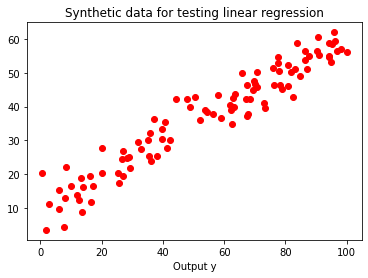

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data

# Suppose the "true" theta = [ 10, 0.5 ]

theta_true = np.array([[10], [0.5]])

# Generate 100 points x between 0 and 100

X = np.random.uniform(0, 100, 100).reshape((100, 1))
X = np.concatenate((np.ones((100, 1)), X), 1)

# Generate the "noisy" values of y for each X

y = X @ theta_true + np.random.normal(0, 5, (100, 1))

# Plot them

plt.plot(X[:,1], y, 'ro')
plt.xlabel('Input x')
plt.xlabel('Output y')
plt.title('Synthetic data for testing linear regression')

Epoch 0: cost 1608.408731 grad[-3717.111465 , -243308.149333]
Epoch 10: cost 41.230276 grad[-261.115301 , -2112.316768]
Epoch 20: cost 41.101137 grad[-231.013605 , -15.089343]
Epoch 30: cost 41.090479 grad[-230.700504 , 3.145578]
Epoch 40: cost 41.079834 grad[-230.646430 , 3.303397]
Epoch 50: cost 41.069195 grad[-230.594621 , 3.304034]
Epoch 60: cost 41.058560 grad[-230.542842 , 3.303304]
Epoch 70: cost 41.047930 grad[-230.491075 , 3.302563]
Epoch 80: cost 41.037305 grad[-230.439320 , 3.301821]
Epoch 90: cost 41.026685 grad[-230.387576 , 3.301080]


"   \n# Plot result\n\nplt.plot(X[:,1], y, 'ko')\nplt.xlabel('Input x')\nplt.xlabel('Output y')\nplt.title('Synthetic data for testing linear regression')\n\nx1 = 0\ny1 = theta_star[0,0]\n\nx2 = 100\ny2 = theta_star[0,0] + theta_star[1,0] * x2\n\nplt.plot((x1, x2), (y1, y2), 'b-', label='Estimated regression line')\n\ny1 = theta_true[0,0]\ny2 = theta_true[0,0] + theta_true[1,0] * x2\n\nplt.plot((x1, x2), (y1, y2), 'r-', label='True regression line')\n\nplt.legend()\n\nplt.show()\n"

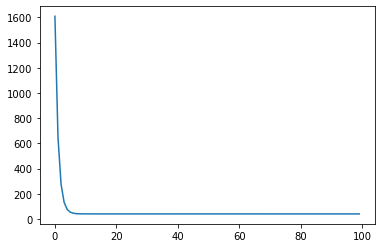

In [18]:
# Implement linear regression

theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

# Gradient descent

def gradient (X,y,theta):
    m = X.shape[0]
    n = theta.shape[0]
    yhat = X@ theta
    J = ((yhat - y)*(yhat - y)).sum()/m
    # Gradient : sum (yhat - y) * x^i
    grad_J = np.zeros((n,1))
    for i in range(m):
        grad_J = grad_J + (yhat[i,0] - y[i,0]) * X[i:i+1,0:].T
    return J, grad_J

alpha = 0.000001
theta = np.array([[0],[0]])
costs = []
for iter in range(100):
    cost, grad = gradient(X,y, theta)
    costs.append(cost)
    if iter%10 == 0:
        print('Epoch %d: cost %f grad[%f , %f]' % (iter, cost, grad[0],grad[1]))
    theta = theta - alpha * grad

plt.plot (costs)
plt.title('Cost over time')